### Data Science Blog Post Project

In [208]:
# Import the required python libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

# Gather data

In [209]:
# Load the Video game dataset into a pandas dataframe
df = pd.read_csv('vgsales.csv')

# Assess data

In [210]:
# View a sample of the dataframe
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [211]:
# Use Describe method to understand basic statistical details like percentile, mean, std, etc...
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [212]:
# Use the columns method to understand the columns in the dataframe
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [213]:
# Use the shape method to count the number of rows and columns in the dataframe
#df.shape

count_row = df.shape[0]
count_col = df.shape[1]

print('Number of Row = {}'.format(count_row))
print('Number of Columns = {}'.format(count_col))

Number of Row = 16598
Number of Columns = 11


In [214]:
# Use the dtypes method to eetermine the types of data you are working with wihtin the dataframe
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [215]:
# Use the isnull method to determine if there are any null items in the dataframe to consider
df.isnull().sum(axis = 0)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [216]:
# Use the select_dbTypes method to identify the categorical and numerical fields in the dataframe

def cat_and_num_val(datasets):
    for col in datasets:
        print("Dataset:", [x for x in globals() if globals()[x] is col][0]) #Name of the dataset)
        print("Numerical columns: ", col.select_dtypes(include=['int', 'float']).columns)
        print("Categorical columns ", col.select_dtypes(include=['category', object]).columns)


datasets = [df]
cat_and_num_val(datasets)

Dataset: df
Numerical columns:  Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')
Categorical columns  Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')


# Clean the data

In [217]:
# Use the fillnamethod to replace empty values
df['Year'] = df['Year'].fillna(0.0)
df['Publisher'] = df['Publisher'].fillna('na')

In [218]:
# User the astype to convert Year from float to integer
df["Year"] = df["Year"].astype(int)

# Analyze the data (Understanding the Platform object)

In [219]:
# Use the describe method to understand the Platform column in the dataset
df['Platform'].describe()

count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [220]:
# Use the unique method to provide a list the unique Platform objects within the dataset
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

# Model the data

In [221]:
# Use the value_counts method to provide the counts of the unique Platform objects within the dataset
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

# Visualize the data

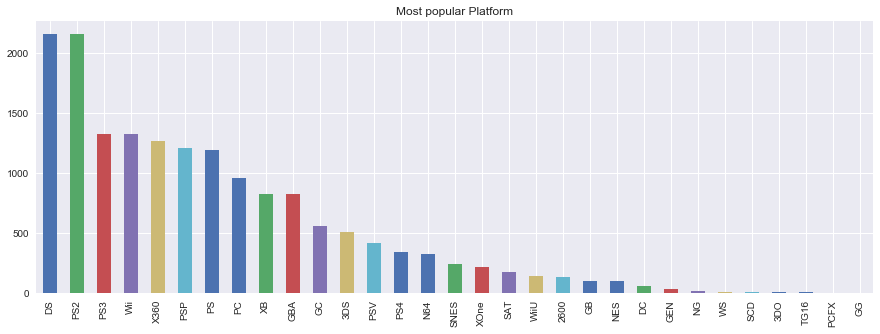

In [222]:
# Use the plt to visualize the Platform counts

df_popular = df.Platform.value_counts()
df_popular.plot(kind="bar", figsize=(15,5));
plt.title("Most popular Platform");

In [223]:
# Use the groupby and agg methods to provide total sales by region for each Platform

df_sales= df.groupby(['Platform']).agg({'NA_Sales':np.sum,'JP_Sales':np.sum,'EU_Sales':np.sum,'Other_Sales':np.sum,'Global_Sales':np.sum})
df_sales.sort_values(by='Global_Sales', ascending=False, inplace=True)
df_sales.head(5)

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,139.20,339.29,193.44,1255.64
X360,601.05,12.43,280.58,85.54,979.96
PS3,392.26,79.99,343.71,141.93,957.84
Wii,507.71,69.35,268.38,80.61,926.71
DS,390.71,175.57,194.65,60.53,822.49


In [224]:
df_sales['percentage']= df_sales['Global_Sales']/df_sales['Global_Sales'].sum()
df_sales.head(5)

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales,percentage
Platform,,,,,,
PS2,583.84,139.20,339.29,193.44,1255.64,0.140760
X360,601.05,12.43,280.58,85.54,979.96,0.109856
PS3,392.26,79.99,343.71,141.93,957.84,0.107376
Wii,507.71,69.35,268.38,80.61,926.71,0.103886
DS,390.71,175.57,194.65,60.53,822.49,0.092203


## Question 1

Understand how Video game Platform sales are performing by total sales in each region

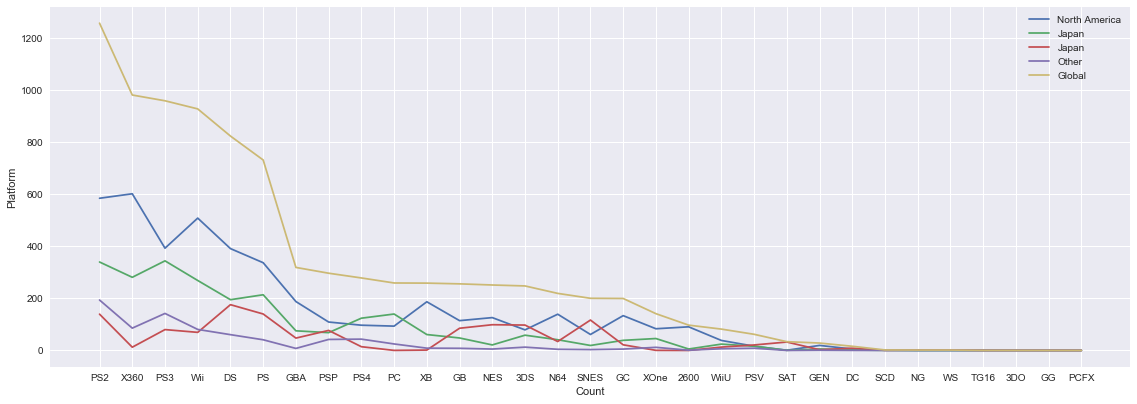

In [237]:
## 1. Understand how Video game Platform sales are performing by total sales in each region

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(df_sales['NA_Sales'], label='North America')
ax.plot(df_sales['EU_Sales'], label='Japan')
ax.plot(df_sales['JP_Sales'], label='Japan')
ax.plot(df_sales['Other_Sales'], label='Other')
ax.plot(df_sales['Global_Sales'], label='Global')

plt.savefig("images/q1", bbox_inches="tight")

ax.legend()
ax.set_xlabel('Count')
ax.set_ylabel('Platform');

### Q1 Results : From the visual representation above we can see that PS2 has outsold all other platforms.

## Understanding the Genre object

In [226]:
# Use the groupby and agg methods to provide the total games by name for each Genre

df_geners = df.groupby(['Genre']).agg({'Name':pd.Series.nunique})
df_geners.reset_index(inplace=True)
df_geners.set_index('Genre', inplace=True)

df_geners.rename(columns={'Name': 'count'}, inplace=True)
df_geners.sort_values(by='count', ascending=False, inplace=True)
df_geners

,count
Genre,
Action,1925
Sports,1379
Misc,1327
Role-Playing,1219
Adventure,1048
Shooter,817
Racing,772
Simulation,726
Fighting,612


In [227]:
# Use the column method to confirm the column names
df_geners.columns

Index(['count'], dtype='object')

## Question 2

Understand how video games are distributed across different Genre's

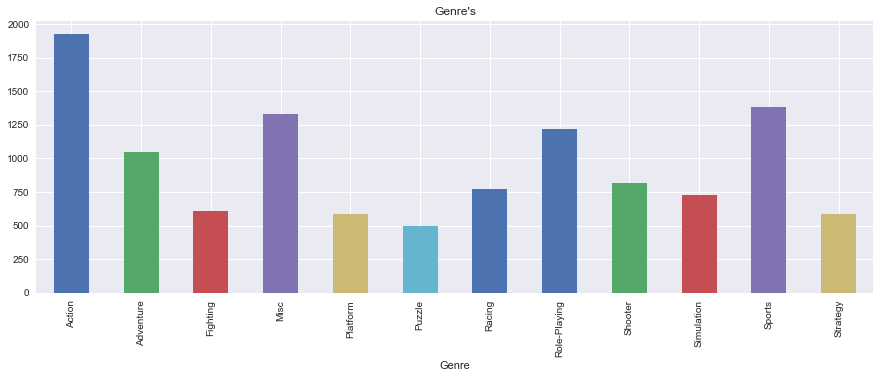

In [238]:
## 2. Understand how video games are distributed across different Genre's

df_geners = df.groupby('Genre')['Name'].nunique().plot(kind='bar', figsize=(15,5))

df_geners.plot(kind='bar', figsize=(15,5))
plt.title("Genre's");

plt.savefig("images/q2", bbox_inches="tight")

plt.show()

### Q2 Results: From the visual represenation above we can determine that the Genre Action leads in popularity.

## Question 3

Predict the Platform sales based on sales reportings

In [229]:
# 3. Predict the Platform sales based on sales reportings

from sklearn.preprocessing import LabelEncoder
df['Name_encoded'] = LabelEncoder().fit_transform(df['Name'])
df['Platform_encoded'] = LabelEncoder().fit_transform(df['Platform'])
df['Genre_encoded'] = LabelEncoder().fit_transform(df['Genre'])
df['Publisher_encoded'] = LabelEncoder().fit_transform(df['Year'])

df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_encoded,Platform_encoded,Genre_encoded,Publisher_encoded
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,11007,26,10,27
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,9327,11,4,6
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,5573,26,6,29
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,11009,26,10,30
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7346,5,7,17


In [230]:
#df['date_col'] =  pd.to_datetime(df['Year'])
#df.Year = pd.to_datetime(df.Year)

<Figure size 720x720 with 0 Axes>

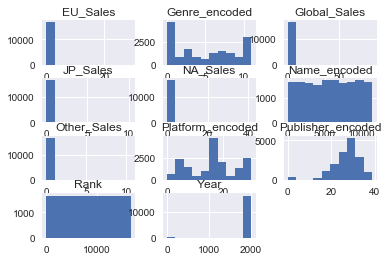

In [231]:
fig = plt.figure(figsize = (10,10))
df.hist();

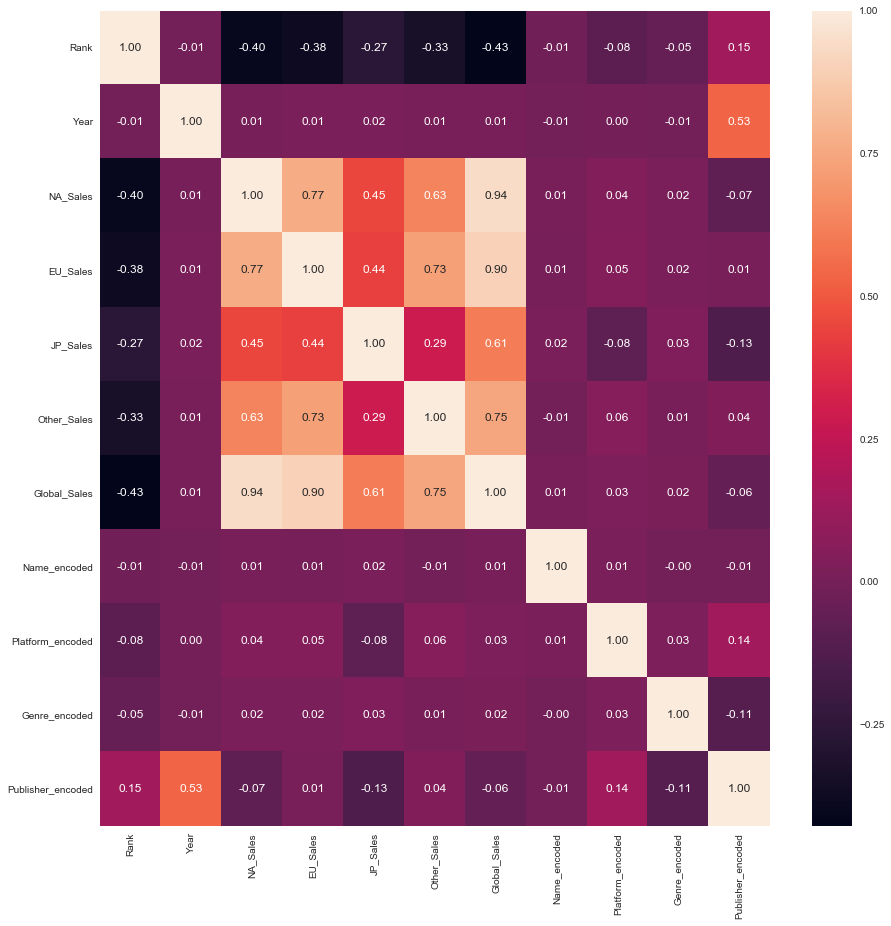

In [232]:
# Use the heatmap visual to provide a look into corelation to use when predicting

sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [233]:
# Use the sklearn LinearRegression model to predict Platform sales

X = df[['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
y = df['Platform_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)

In [234]:
print('R2 Score', r2_score(y_test, y_test_preds))
print('Mean Squared', mean_squared_error(y_test, y_test_preds))

R2 Score 0.017058435700280983
Mean Squared 70.54316549647397


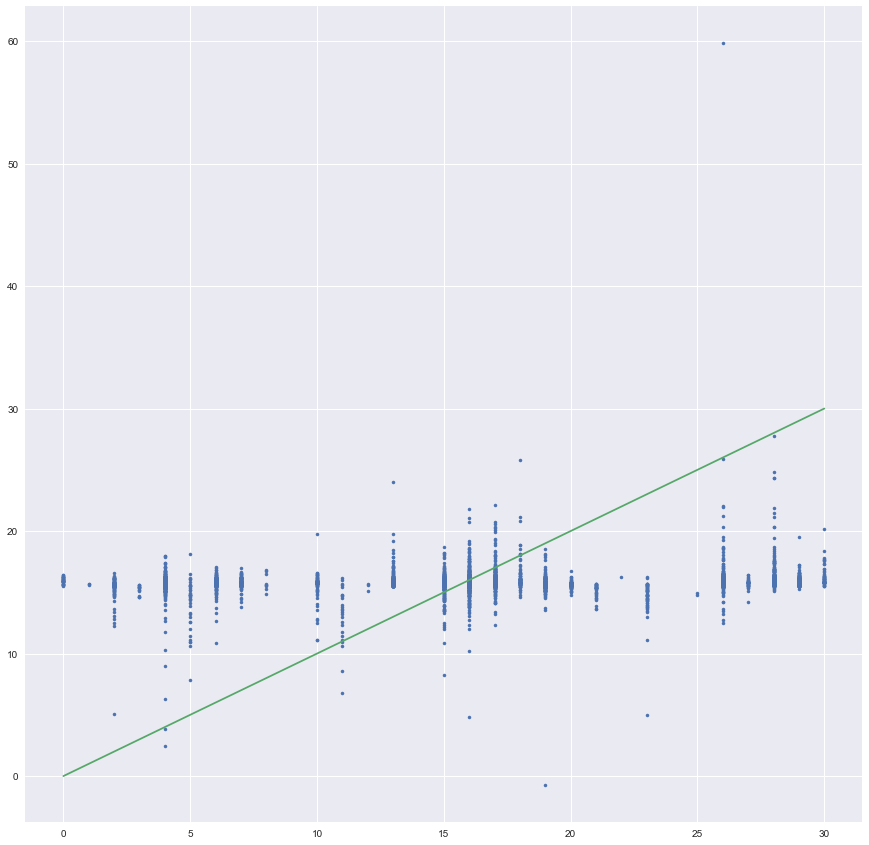

In [239]:
# Use the plot to display the prediction and actual data
y_pred = lm_model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y)

plt.savefig("images/q3", bbox_inches="tight")

plt.show()

### Q3 Results: Using the visual represenation above we can see the predicted sales, trending upward.